In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Part A: Logistic Regression with Scikit-learn
- Load the dataset and split it into training and testing subsets.
- Use the scikit-learn library to develop a logistic regression model based on the training data. Use only Feature1 and Feature2.
- Plot the data points and the decision boundary of the model.
- Evaluate the model on the testing data and report its accuracy.

In [2]:
#Loading dataset into a dataframe

df = pd.read_csv('data.csv')

In [3]:

# Assigining names to the columns in dataset

df.columns = ['Feature1', 'Feature2', 'Label']

In [4]:
#Printing first 10 rows of the dataset

df.head(100)

,Feature1,Feature2,Label
0,-5,807,0
1,-5,-344,0
2,-5,-126,0
3,-5,243,0
4,-5,185,0
...,...,...,...
95,0,-206,0
96,0,331,0
97,0,95,0
98,0,28,0


In [54]:
# Split the dataset into features (X) and labels (y)
X = df[['Feature1', 'Feature2']]
y = df['Label']

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

In [8]:

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 90.0


In [9]:
# Print intercepts (bias term) and coefficients
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: [-2.37152256]
Coefficients: [[0.14989096 0.00851051]]


In [10]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  3]
 [ 1 26]]


In [11]:
from sklearn.metrics import classification_report


# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.90      0.96      0.93        27

    accuracy                           0.90        40
   macro avg       0.90      0.87      0.88        40
weighted avg       0.90      0.90      0.90        40



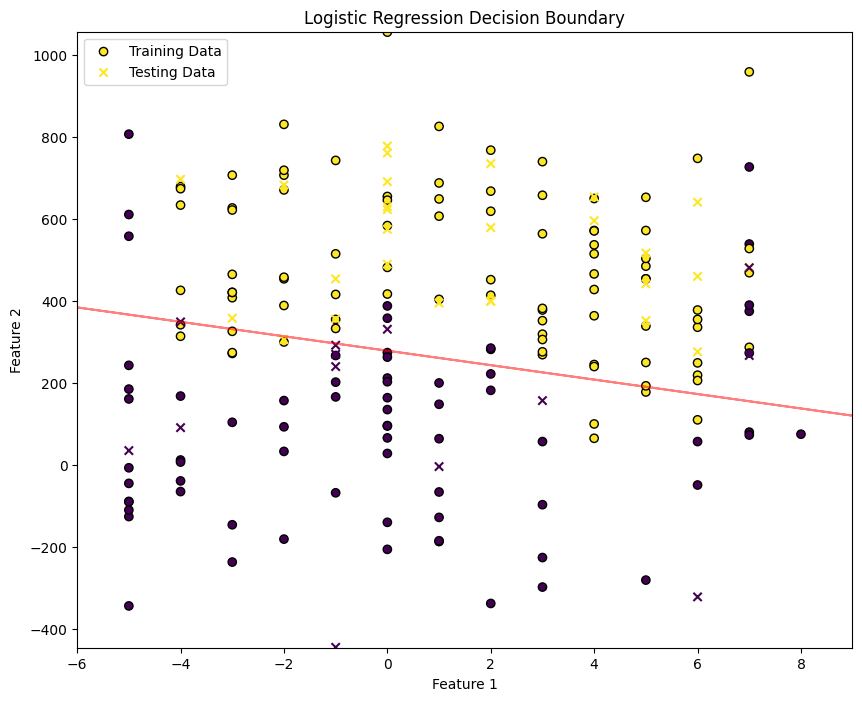

In [12]:

# Plot the data points
plt.figure(figsize=(10, 8))
plt.scatter(X_train['Feature1'], X_train['Feature2'], c=y_train, cmap='viridis', marker='o', edgecolors='k', label='Training Data')
plt.scatter(X_test['Feature1'], X_test['Feature2'], c=y_test, cmap='viridis', marker='x', edgecolors='k', label='Testing Data')

# Plot the decision boundary
x_min, x_max = X['Feature1'].min() - 1, X['Feature1'].max() + 1
y_min, y_max = X['Feature2'].min() - 1, X['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, alpha=0.5, levels=[0.5], colors='red')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()


# Part B: Logistic Regression Without Scikit-learn
- Implement logistic regression from scratch.
- Use the same training and testing data splits as in Part A.
- Develop a logistic regression model based on the training data, using only Feature1 and 
Feature2.
- Display the cost (loss) as a function of iterations during the training process.
- Plot the data points and the decision boundary of your model.
- Evaluate the model on the testing data and report its accuracy.

In [14]:
#Logistic Regression model from scratch 

# Define the sigmoid function
def sigmoid(z):
    # Limiting the range of z to prevent overflow/underflow issues
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# Define the cost function (binary cross-entropy)
def cross_entropy_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Implement gradient descent
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (h - y)) / m
        weights -= learning_rate * gradient
        cost = cross_entropy_cost(X, y, weights)
        if i%5000 ==0:
            cost_history.append(cost)
        

    return weights, cost_history

# Training
def train(X_train, y_train, learning_rate, iterations):
    # Initialize weight parameters
    n_features = X_train.shape[1]
    weights = np.random.random(n_features+1) 

    # Add bias term to features
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

    # Train model using gradient descent
    weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

    return weights, cost_history

# Prediction on test data
def predict(X_test, weights):
    # Add bias term to features
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    predictions = sigmoid(np.dot(X_test, weights))
    return (predictions >= 0.5).astype(int)

# Accuracy Evaluation
def evaluate_accuracy(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    return accuracy



In [15]:
#Train the model
learning_rate = 0.1
iterations = 100000
weights, cost_history = train(X_train, y_train, learning_rate, iterations)



In [16]:
# Make predictions
y_pred = predict(X_test, weights)

In [17]:
# Evaluate the model
model2_accuracy = evaluate_accuracy(y_test, y_pred)
print("Accuracy:", model2_accuracy*100)

Accuracy: 90.0


In [18]:
# Generate confusion matrix
model2_conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(model2_conf_matrix)

Confusion Matrix:
[[ 4  9]
 [ 0 27]]


In [19]:
#Printing the weights obtained by self coded version of logistic regression model
print("Weights and intercept of the model are", weights)

Weights and intercept of the model are [-889.30583504   52.21883017   26.72180348]


In [20]:
from sklearn.metrics import classification_report

# Assuming you have already trained the model and made predictions

# Print intercepts (bias term)
intercept = weights[0]
coefficients = weights[1:]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Generate classification report
model2_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(model2_report)


Intercept: -889.30583503566
Coefficients: [52.21883017 26.72180348]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.75      1.00      0.86        27

    accuracy                           0.78        40
   macro avg       0.88      0.65      0.66        40
weighted avg       0.83      0.78      0.73        40



Here in this implementation of the Linear regression the cost that we are getting during the training are mostly undefined,if we further increases the iteration we might gets the costs but the execution time getting much increased so it is difficult to plot the cost vs the iterations for the choosen hyperparameters 

# Part C: Logistic Regression with Feature Engineering (Scikit-learn)
- Enhance your dataset by adding new features that are at a higher degree of one of the original features (e.g., Feature1^2, Feature1 * Feature2).
- Use the scikit-learn library to develop a logistic regression model based on the enhanced training data.
- Plot the data points and the decision boundary of the model.
- Evaluate the model on the testing data and report its accuracy

In [21]:
#Adding New two features 

df['Feature3'] = df['Feature1']**2
df['Feature4'] = df['Feature2']**2

In [22]:
#Printing Shape of df 
print("Shape of data after adding two new features",df.shape)

Shape of data after adding two new features (199, 5)


In [23]:
# Split the dataset into features (X) and labels (y)
X_new= df[['Feature1', 'Feature2' , 'Feature3','Feature4']]
y_new = df['Label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [24]:
#Priniing shapes of splitted data

print("Shape of X_train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape)



Shape of X_train is (159, 4)
Shape of y_train is (159,)
Shape of X_test is (40, 4)
Shape of y_test is (40,)


In [25]:
# Initialize the logistic regression model
model3 = LogisticRegression()

# Train the model on the training data
model3.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Evaluate the model on the testing data
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy3*100)

Accuracy: 77.5


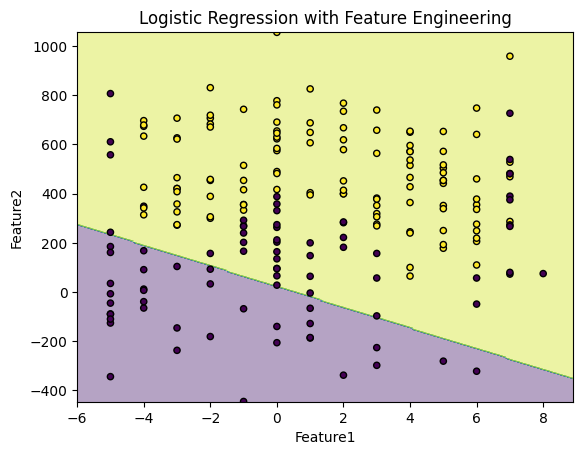

In [27]:
# Define the range of the plot
x_min, x_max = X_new['Feature1'].min() - 1, X_new['Feature1'].max() + 1
y_min, y_max = X_new['Feature2'].min() - 1, X_new['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the labels for each point in the mesh grid
Z = model3.predict(np.c_[xx.ravel(), yy.ravel(), np.ones_like(xx.ravel()), np.ones_like(xx.ravel())])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_new['Feature1'], X_new['Feature2'], c=y_new, s=20, edgecolor='k')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Logistic Regression with Feature Engineering')
plt.show()


In [28]:
#Model 4 using PolyFeatures  inbuilt function 

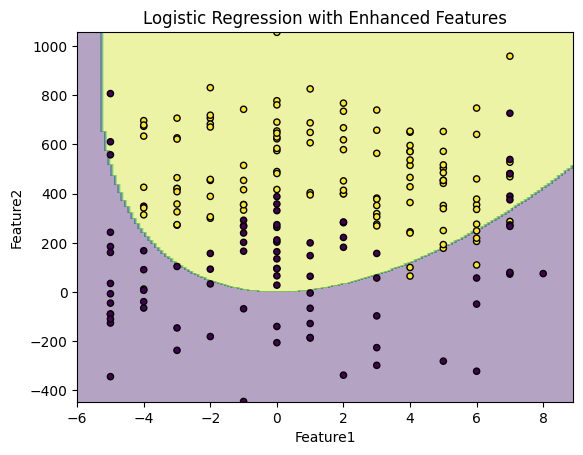

Accuracy: 82.5


In [29]:

from sklearn.preprocessing import PolynomialFeatures


# Enhance the dataset by adding polynomial features
X = df[['Feature1', 'Feature2']].values
y = df['Label'].values

# Adding polynomial features of a higher degree to Feature1
poly = PolynomialFeatures(degree=2)
X_enhanced = poly.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_enhanced, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model4 = LogisticRegression()
model4.fit(X_train, y_train)

# Plot the data points and decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model4.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Logistic Regression with Enhanced Features')
plt.show()

# Evaluate the model on the testing data
y_pred = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


 Logistic Regression with Feature Engineering (Without Scikit-learn)
- Use the enhanced dataset from Part C.
- Implement logistic regression from scratch to develop a model based on the enhanced 
training data.
- Display the cost (loss) as a func on of itera ons during the training process.
- Plot the data points and the decision boundary of your model.
- Evaluate the model on the testing data and report its accuracy

In [33]:
# Split the dataset into features (X) and labels (y)
X1= df[['Feature1', 'Feature2' , 'Feature3','Feature4']]
y1 = df['Label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [35]:
#Train the model
learning_rate = 0.1
iterations = 100000
weight, cost = train(X_train, y_train, learning_rate, iterations)

In [36]:
# Make predictions
y_pred = predict(X_test, weight)

In [37]:
# Evaluate the model
model5_accuracy = evaluate_accuracy(y_test, y_pred)
print("Accuracy:", model5_accuracy*100)

Accuracy: 70.0


In [38]:
# Generate confusion matrix
model5_conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(model5_conf_matrix)

Confusion Matrix:
[[ 1 12]
 [ 0 27]]


In [39]:
#Printing the weights obtained by self coded version of logistic regression model
print("Weights and intercept of the model are", weight)

Weights and intercept of the model are [ -2787.04787918   1285.58100906  82575.99195718 -40322.42269077
   7716.4585684 ]


Conclusion:

    Here we can see that the accuracy of the model is dropped after adding the extra features which indicates that the model is getting overfitted i.e the decision boundary is getting much smoother and is loosing its ability to generalize and perfrom on the test data and other reason for this might be the less correlation between the output and the newly added features.